In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EastWestAirlines.csv')
print(df)
data=df

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [3]:
type(df)
df.shape

(3999, 12)

In [4]:
df.dtypes

ID                   int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('ID', axis = 1, inplace= True)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(df.iloc[:,1:])

In [11]:
scaled_data_df

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [12]:
important_columns = ['Balance', 'Qual_miles', 'cc1_miles',
       'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll',
       'Award']
final_data = df[important_columns].dropna()

<Axes: >

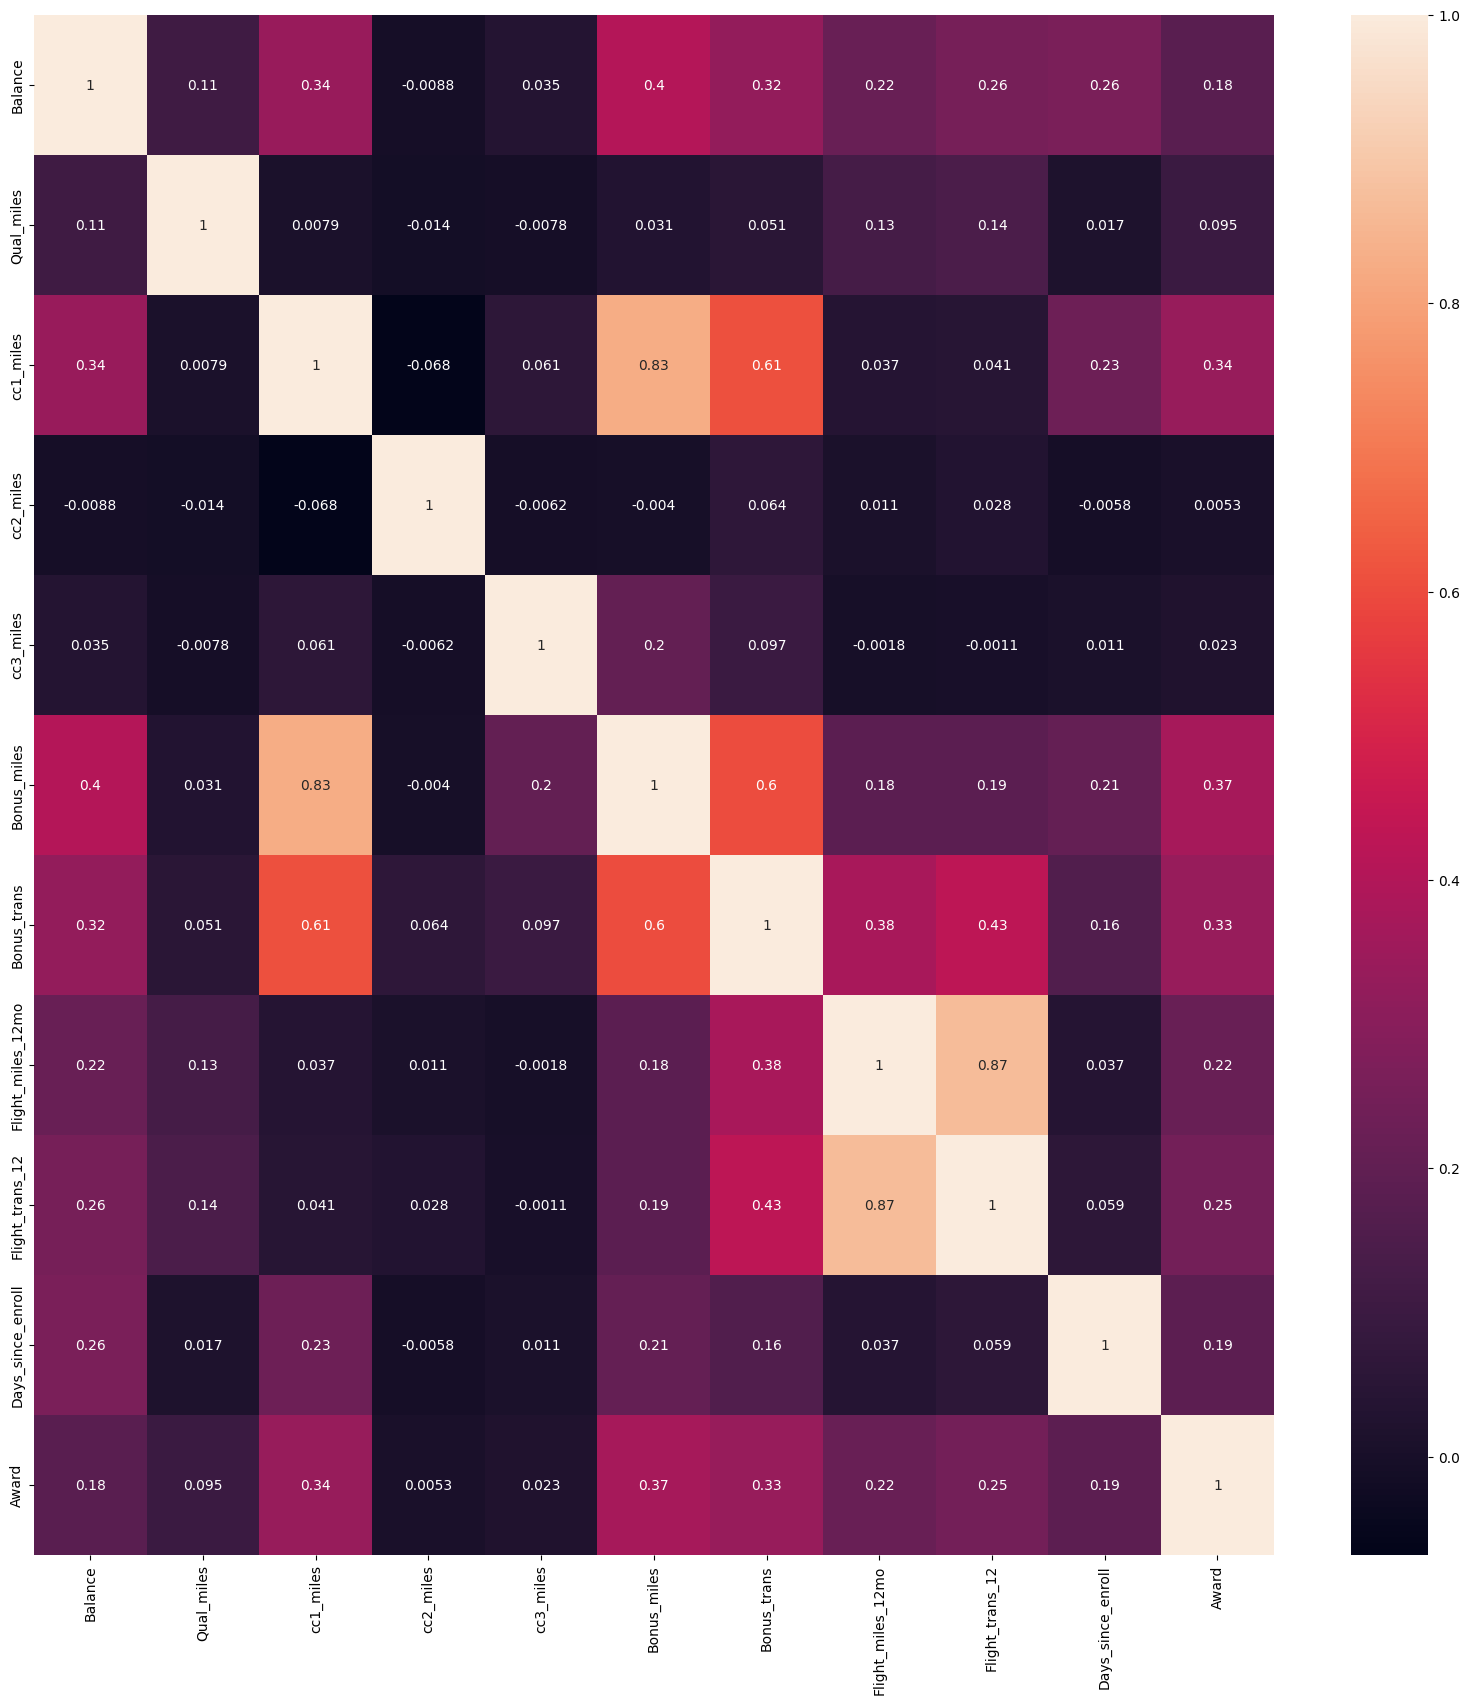

In [13]:
corr_matrix = final_data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True)

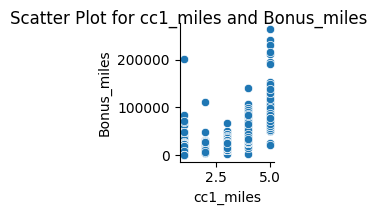

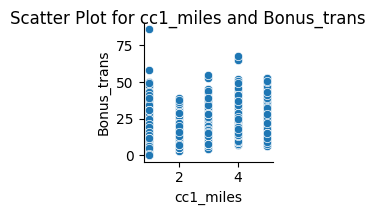

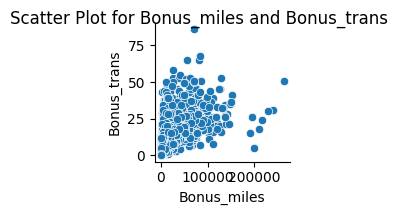

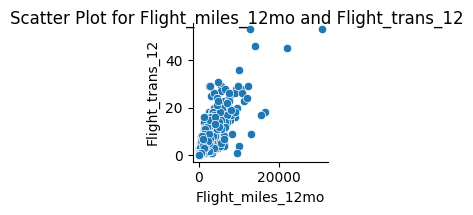

In [14]:
# Find pairs of columns with correlation greater than 0.60or less than -0.6
high_corr_pairs = []
checked = set()
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# scatter plot matrix for the selected pairs
for pair in high_corr_pairs:
    sns.pairplot(final_data, height=2, x_vars=pair[0], y_vars=pair[1], kind='scatter')
    plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.02)
    plt.show()

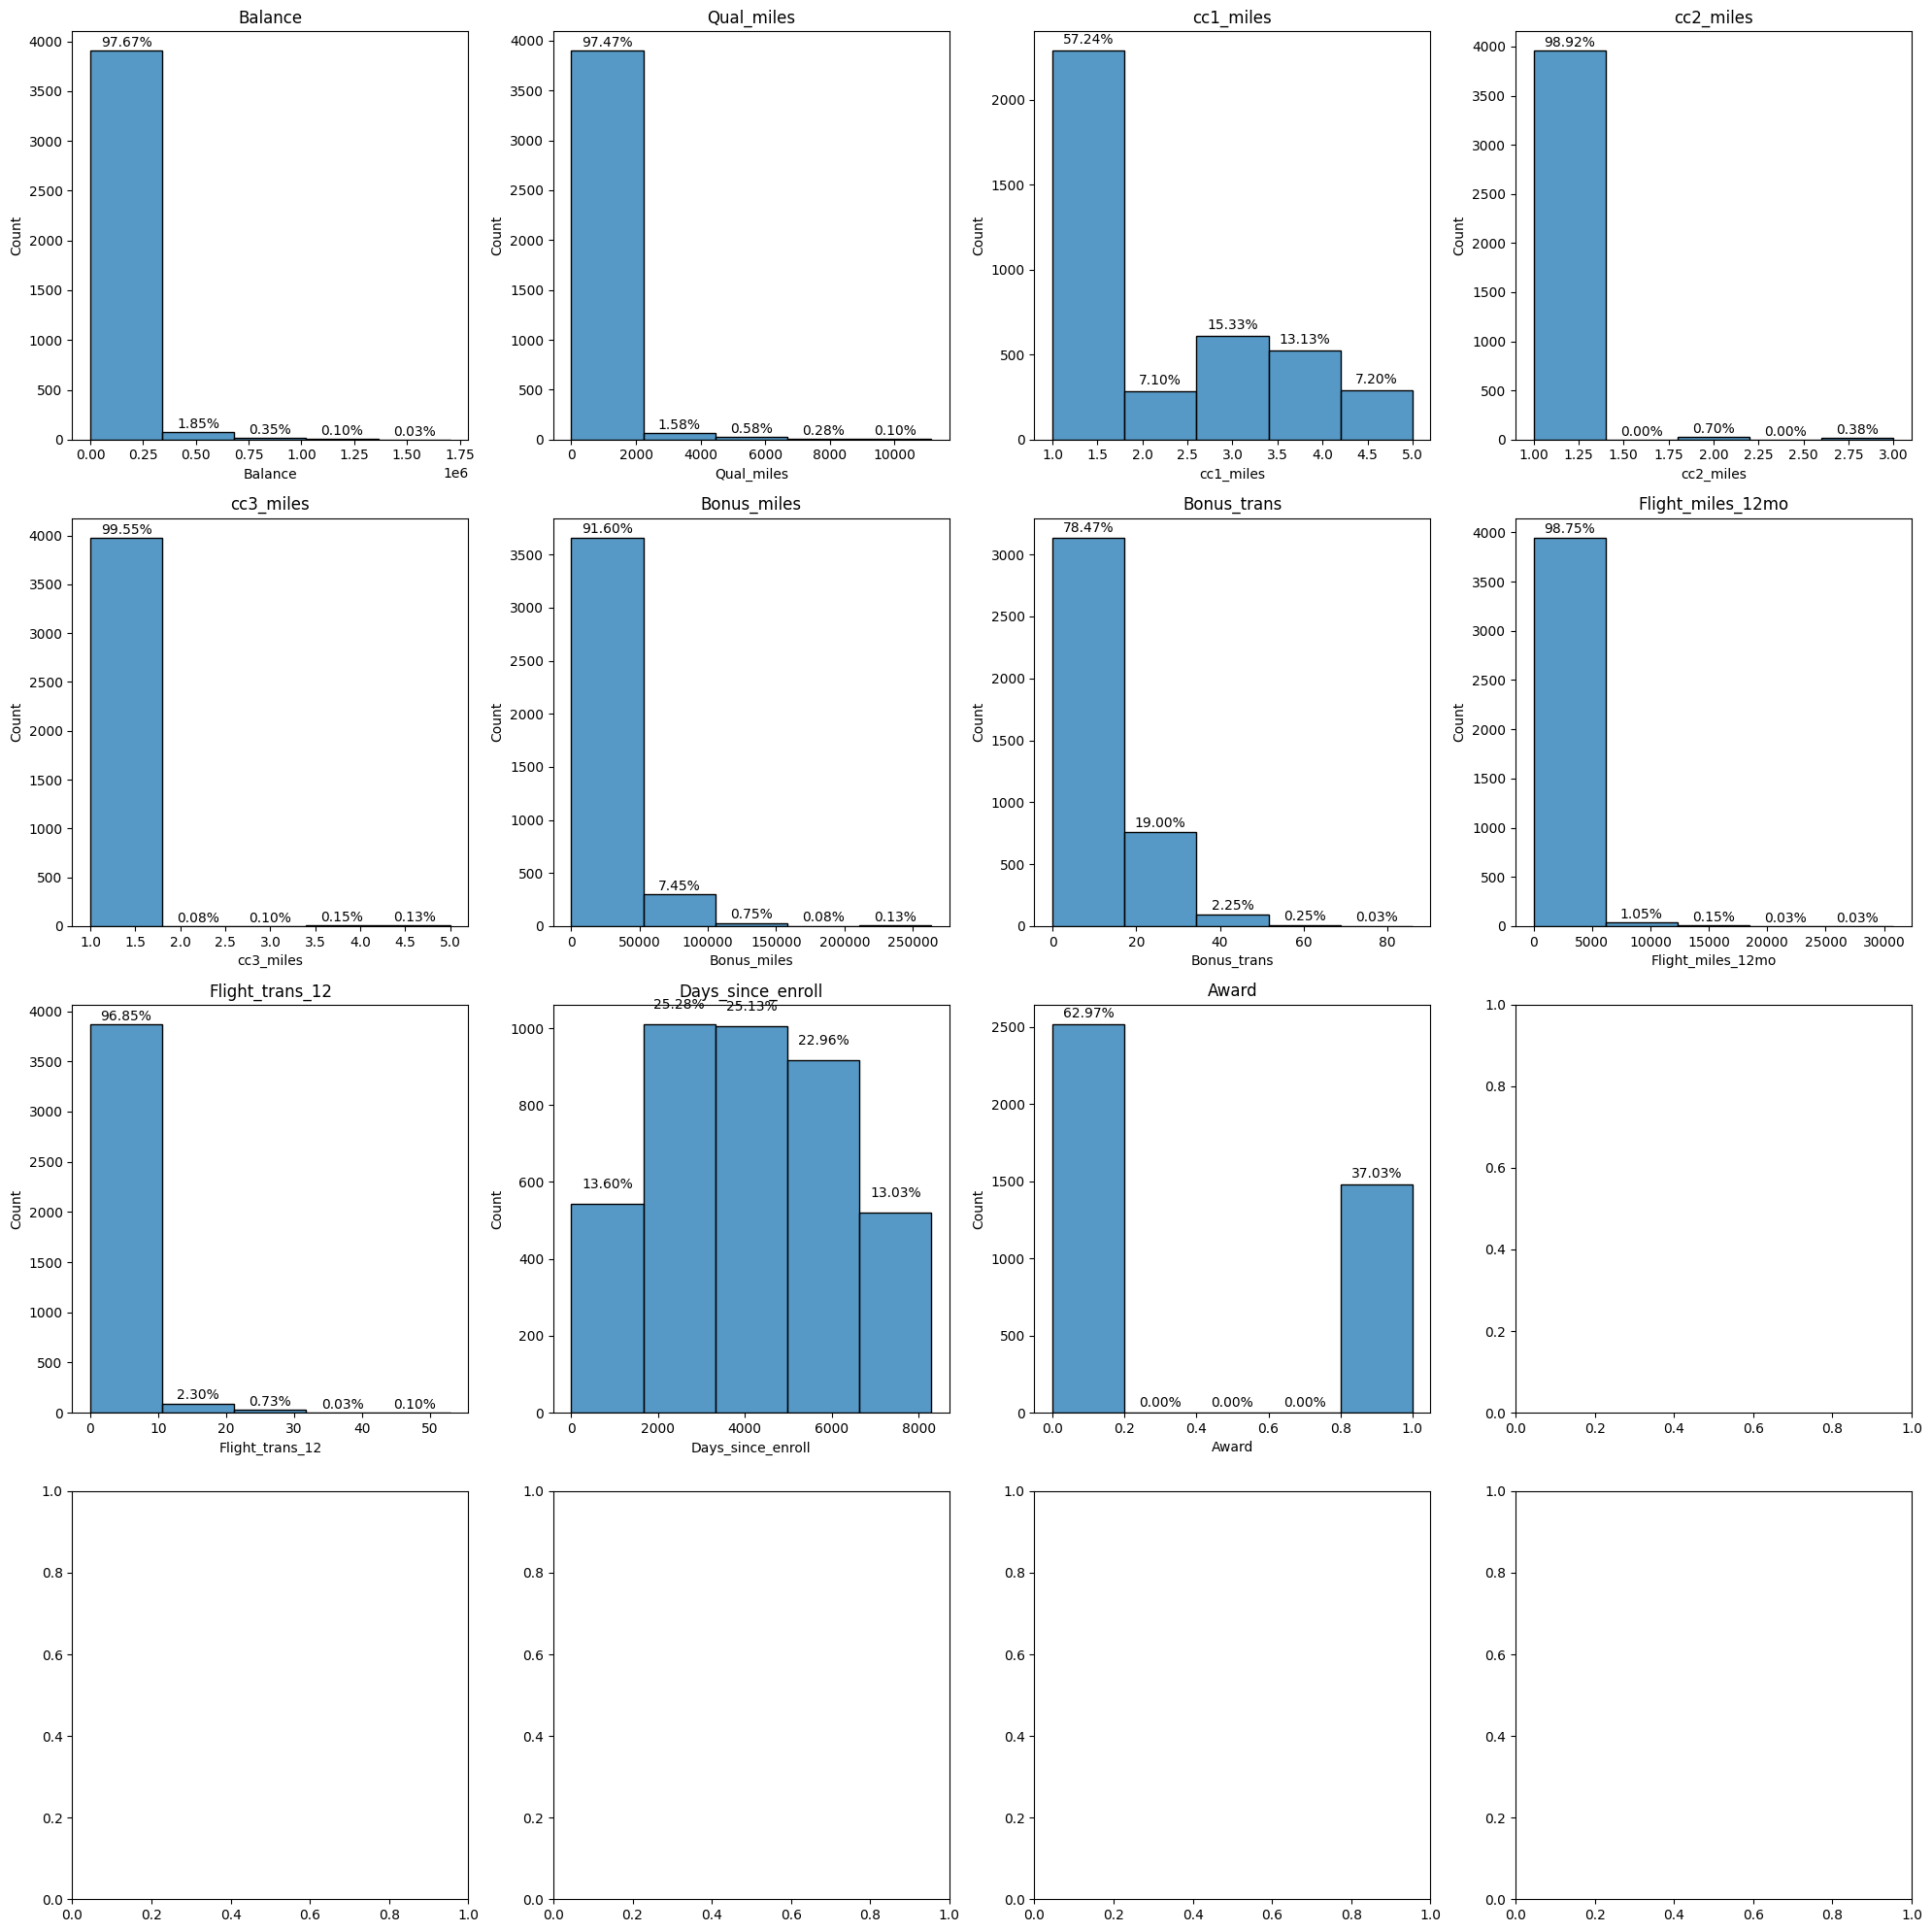

In [15]:
# Histograms for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i, col in enumerate(important_columns):
    row, col_num = divmod(i, 4)
    sns.histplot(final_data[col], bins=5, kde=False, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)

    # percentage
    total = len(final_data[col])
    for p in axes[row, col_num].patches:
        height = p.get_height()
        axes[row, col_num].text(p.get_x() + p.get_width() / 2.,
                                height + 0.01 * total,
                                '{:.2%}'.format(height / total),
                                ha="center")

plt.tight_layout()
plt.show()

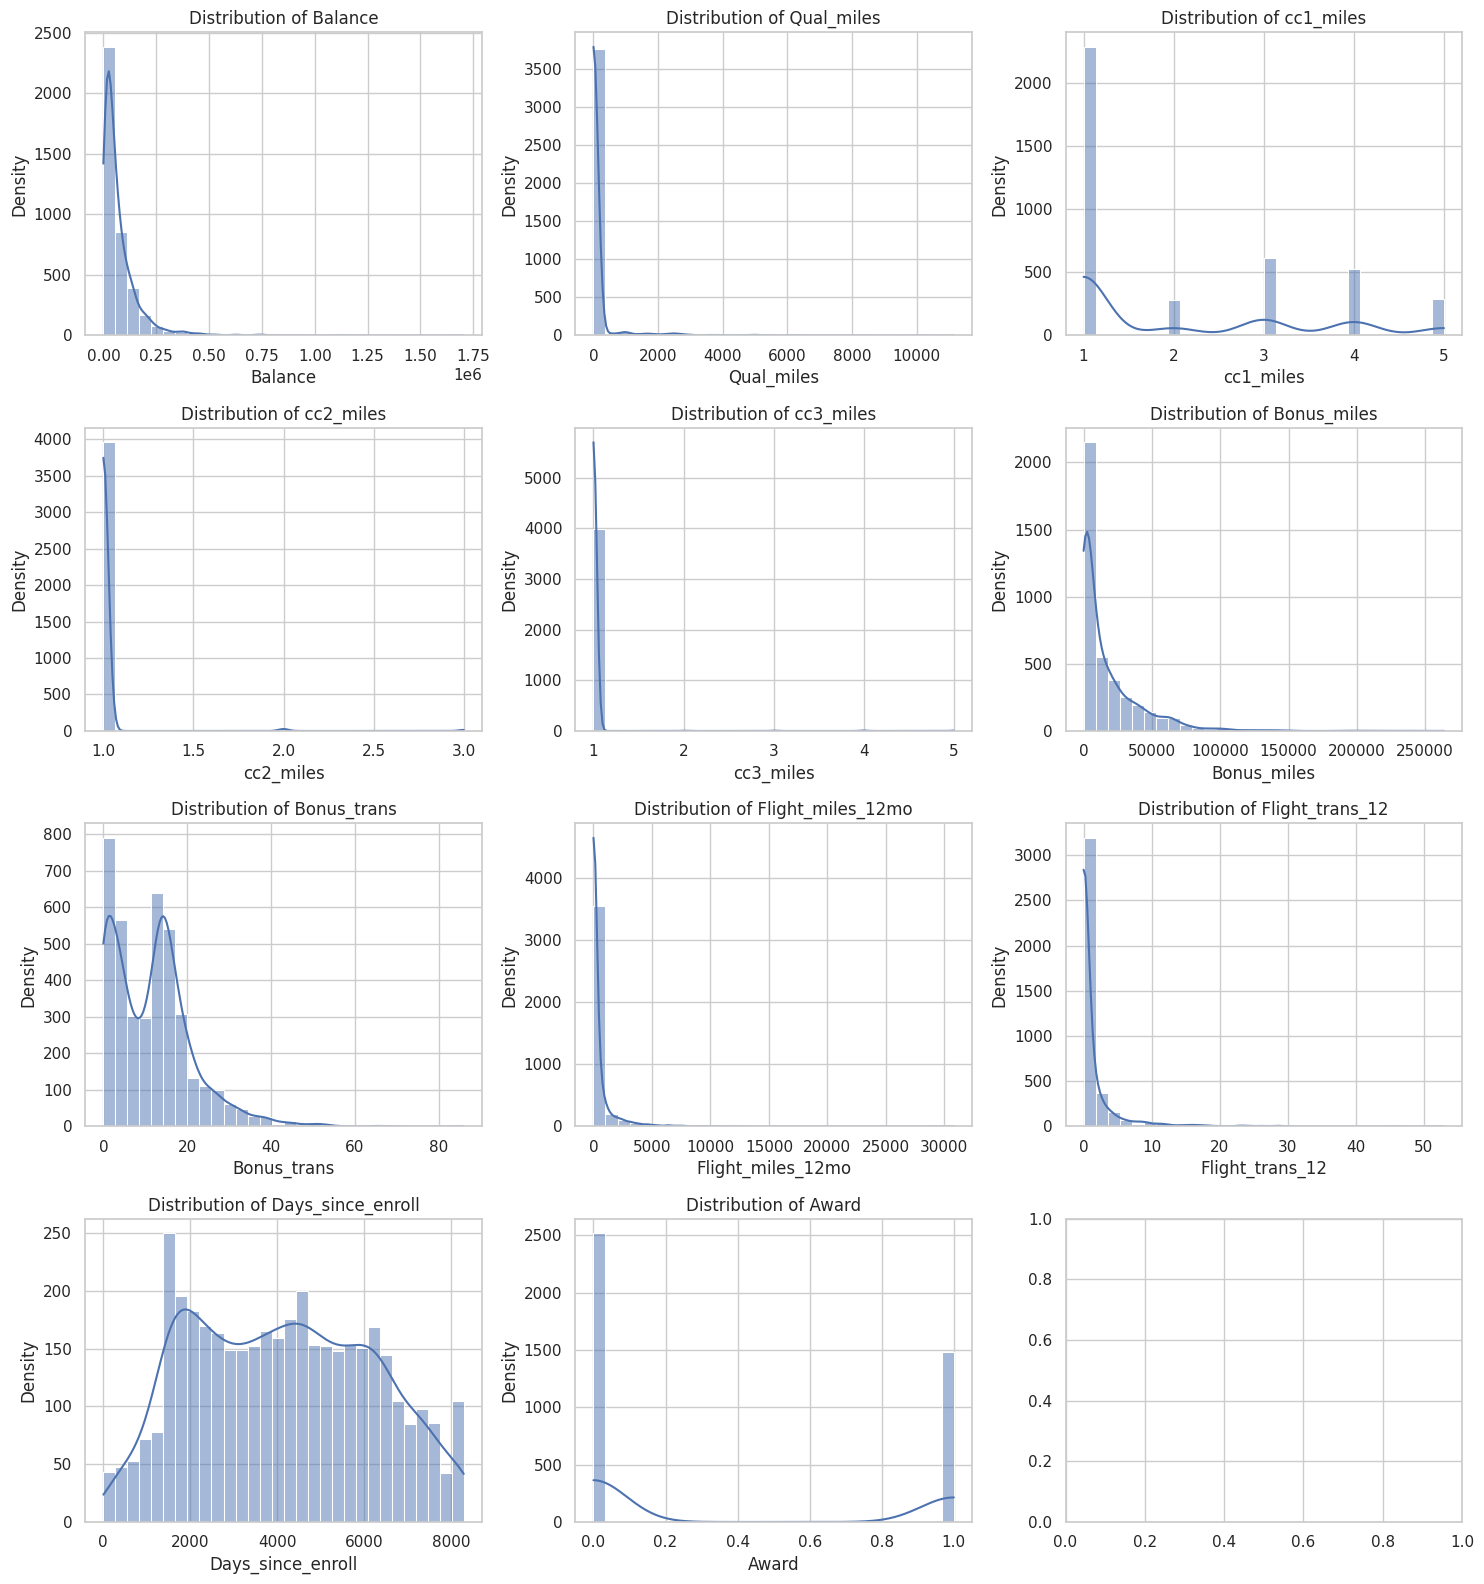

In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")

# number of rows and columns for the subplot grid
num_columns = len(important_columns)
num_rows = (num_columns + 2) // 3

# subplots for histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(important_columns):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set(xlabel=col, ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
df.cc1_miles.value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [18]:
df.cc2_miles.value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [19]:
df.cc3_miles.value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [21]:
df.Award.value_counts()

Award
0    2518
1    1481
Name: count, dtype: int64

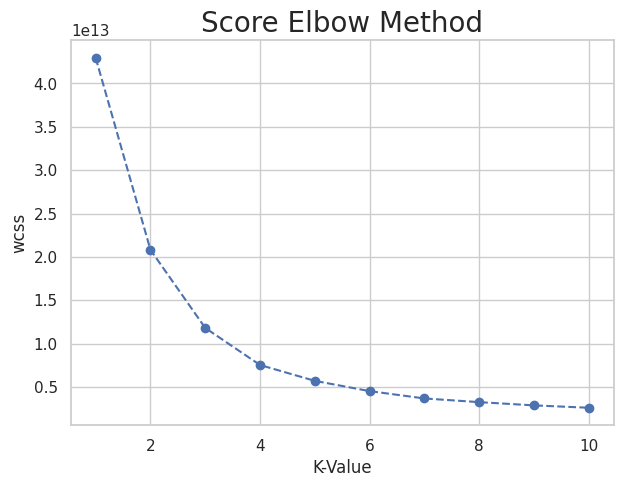

In [27]:
rcParams['figure.figsize'] = (7, 5);
wcss= []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()

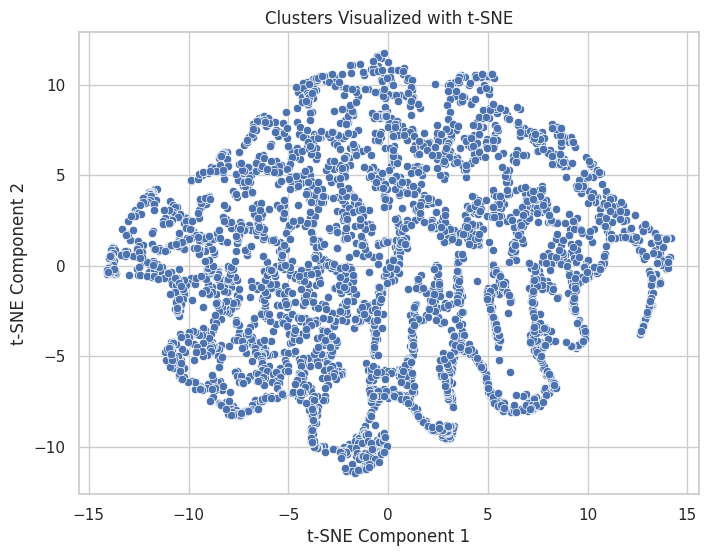

In [28]:
# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [29]:
class K_means:
    def __init__(self, K):
        self.K = K
        self.centroids = None

    def findClosestCentroids(self, X):
        m, _ = X.shape
        closest_centroids = np.zeros(m, dtype=int)

        for i in range(m):
            distances = np.linalg.norm(X.iloc[i].values - self.centroids, axis=1)
            closest_centroids[i] = np.argmin(distances)

        return closest_centroids

    def computeCentroids(self, X, idx):
        centroids = X.groupby(idx).mean().values

        return centroids

    def kMeansInitCentroids(self, X):
        idx = np.random.choice(X.index, self.K, replace=False)
        centroids = X.loc[idx].values

        return centroids

    def KMeans_alg(self, X, initial_centroids=None):
        if initial_centroids is None:
            self.centroids = self.kMeansInitCentroids(X)
        else:
            self.centroids = initial_centroids

        idx = self.findClosestCentroids(X)
        self.centroids = self.computeCentroids(X, idx)

        return self.centroids, idx

    def fit_predict(self, X):
        return self.findClosestCentroids(X)

In [34]:
# Number of clusters (K)
n_clusters = 4

# Instantiate the KMeans model
kmeans_amgad = K_means(n_clusters)

# KMeans
centroids, idx = kmeans_amgad.KMeans_alg(df)

# fit
predictions = kmeans_amgad.fit_predict(df)

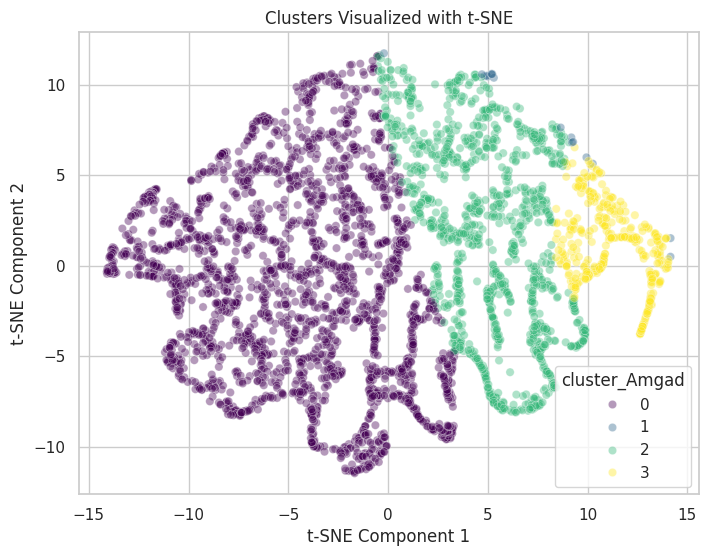

In [35]:
# Add the cluster information to the reduced data
df_tsne['cluster_Amgad'] = predictions

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster_Amgad', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [36]:
# Number of clusters (K)
n_clusters = 4

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

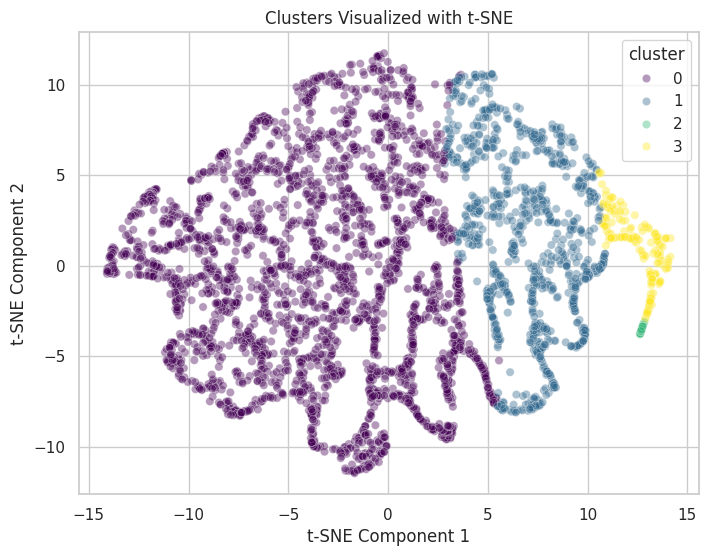

In [37]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()